In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Activation functions

#### A neuron is something that takes inputs and produces output.
We already saw one: (`o1`) in our perceptron.

![Image](https://marcomilanesio.github.io/material/30.11/perceptron.png)

#### Q: How to produce output? A: Activation function
We used the sigmoid in the perceptron example but many others exist.

**COMMON** feature: **ALL** activation functions **MUST** clearly *separate* two behaviours: `activated` and `not activated`.


The most used are:

### STEP FUNCTION

$$
f(0) =
\begin{cases}
0, & \text{if }x < 0 \\
1, & \text{if }x >= 0
\end{cases}
$$

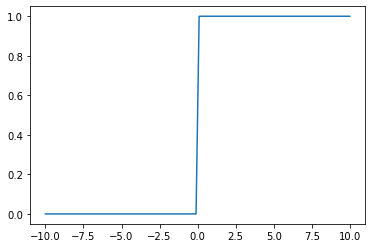

In [2]:
def stepfunction(x):
    if x < 0:
        return 0
    return 1

inrange = np.linspace(-10, 10, 100)
out = [stepfunction(x) for x in inrange]
plt.plot(inrange, out)

Step function is non-differentiable at zero hence it is not able to make progress with the gradient descent approach and fails in the task of updating the weights.

So: 

### SIGMOID FUNCTION

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

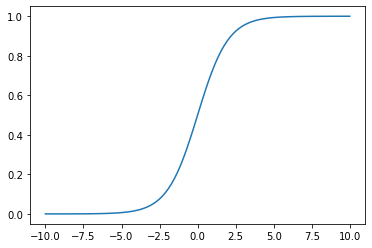

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

out = [sigmoid(x) for x in inrange]
plt.plot(inrange, out)

It solves the problem of non-differentiation at `0` but it suffers from a problem of vanishing gradients. All input is squeezed into a very small output range `[0,1]` and has very steep gradients (remember the scaling in last notebook?). Thus, there remain large regions of input space, where even a large change produces a very small change in the output. This is referred to as the problem of vanishing gradient. This problem increases with an increase in the number of layers $\rightarrow$ the *deeper* the network the higher is the impact of this.

### TANH

a.k.a. rescaled sigmoid $\rightarrow$ out in `[-1, 1]` (instead of `[0, 1]`).


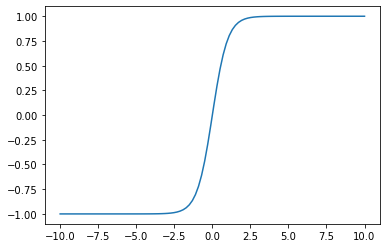

In [4]:
out = np.tanh(inrange)
plt.plot(inrange, out)

**Why?** 
Since data is centered around `0` derivatives of `tanh` are higher than `sigmoid`. 

A higher gradient helps in a better learning rate. Let's see this.


In [5]:
def tanh(x):
    # exp version of tanh
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    
def deriv_tanh(x):
    return 1 - x**2

def deriv_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

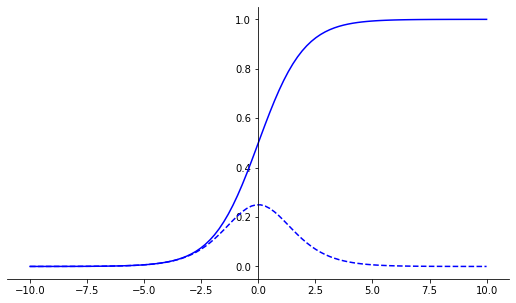

In [6]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax.plot(inrange, [sigmoid(x) for x in inrange], c='b')
ax.plot(inrange, [deriv_sigmoid(x) for x in inrange], c='b', linestyle='dashed')

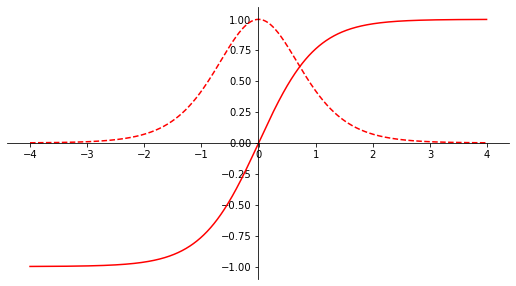

In [7]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

z = np.arange(-4,4,0.01)
fig, ax = plt.subplots(figsize=(9, 5))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')# Create and show plot

ax.plot(z,tanh(z)[0], color="r")
ax.plot(z,tanh(z)[1], color="r", linestyle='dashed')


### ReLU

Rectified Linear Unit. The most commonly used activation function in deep networks.


$$
f(x) = \textrm{max}(0, f(x))
$$


In [8]:
def relu(x):
    return max(0, x)

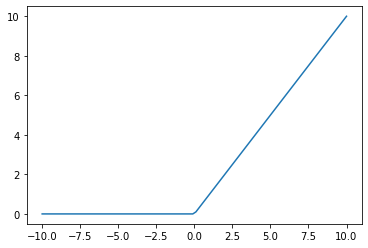

In [9]:
plt.plot(inrange, [relu(x) for x in inrange])

non-linear, so that we can easily backpropagate the errors and have multiple layers of neurons being activated by the ReLU function.